In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [14]:
data= pd.read_csv("data_cardiovascul_risk.csv")

In [27]:
def univeriate_analysis(column_name):
    data_ed = pd.DataFrame(sorted(list(data[column_name].unique())))
    return data_ed

In [ ]:
univeriate_analysis()

In [16]:
data.shape

(3390, 17)

Demographic:   

• Sex: male or female ("M" or "F")   
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)   
Education :   
1 - Higher Secorndary, 2- Graduate, 3 - Post Graduate 4- Doctarte or PHD  
Behavioural:   
• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")   
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day .(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)  
Medical (history):   
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)   
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)   
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)     
• Diabetes: whether or not the patient had diabetes (Nominal)   
Medical(current):   
• Tot Chol: total cholesterol level (Continuous)   
• Sys BP: systolic blood pressure (Continuous) • Dia BP: diastolic blood pressure (Continuous)   
• BMI: Body Mass Index (Continuous)   
• Heart Rate: heart rate(Continuous - In medical research, variables such as heart rate thought discrete, are considered continuous because of a large number of possible values.)    
• Glucose: glucose level (Continuous)   
Predict variable (desired target):   
• 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) – DV   

<AxesSubplot:xlabel='age', ylabel='count'>

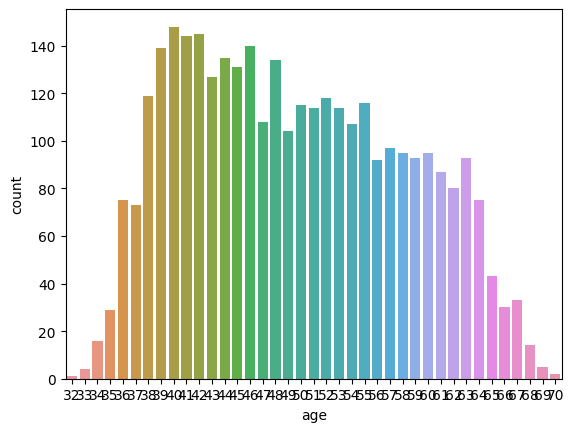

In [35]:
sns.countplot(data=data, x='age')

In [29]:
for i in data.select_dtypes("0"):
    print(i)

TypeError: data type '' not understood

In [28]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical Variable:", len(object_cols))

int_ = (data.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer Variable:", len(num_cols))

float_ = (data.dtypes == 'float64')
num_cols = list(float_[float_].index)
print("float Variable:", len(num_cols))


Categorical Variable: 2
Integer Variable: 6
float Variable: 9


In [16]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

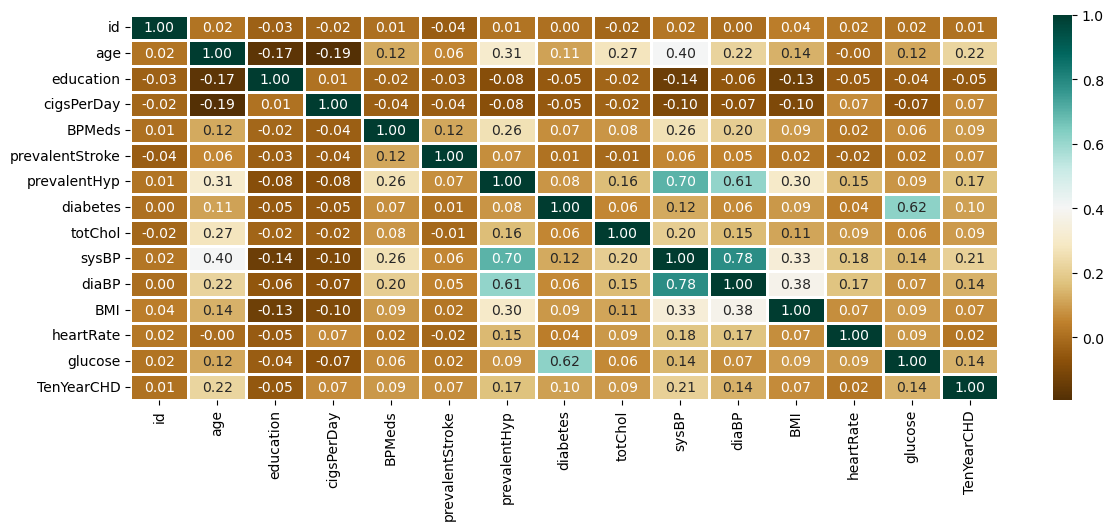

In [20]:
plt.figure(figsize=(14,5))
sns.heatmap(data.corr(),
           cmap ='BrBG',
           fmt = '.2f',
           linewidths=2,annot=True)
plt.show()

In [21]:
data = data.dropna()

In [22]:
data1=(data.isnull().sum()/len(data))*100
data1.sort_values(ascending=False)

id                 0.0
diabetes           0.0
glucose            0.0
heartRate          0.0
BMI                0.0
diaBP              0.0
sysBP              0.0
totChol            0.0
prevalentHyp       0.0
age                0.0
prevalentStroke    0.0
BPMeds             0.0
cigsPerDay         0.0
is_smoking         0.0
sex                0.0
education          0.0
TenYearCHD         0.0
dtype: float64

Text(0, 0.5, 'totChol')

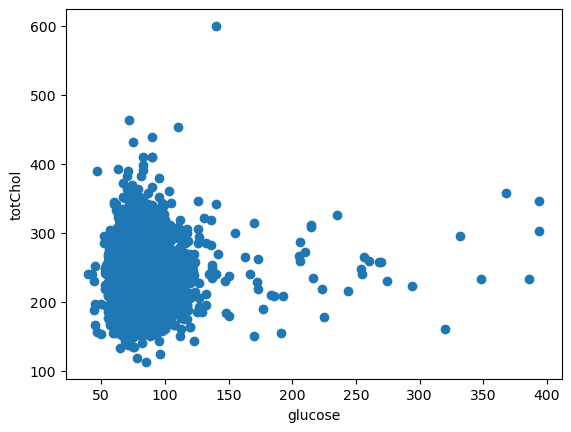

In [23]:
plt.scatter(data['glucose'], data['totChol'])
plt.xlabel('glucose')
plt.ylabel('totChol')

Text(0, 0.5, 'heartRate')

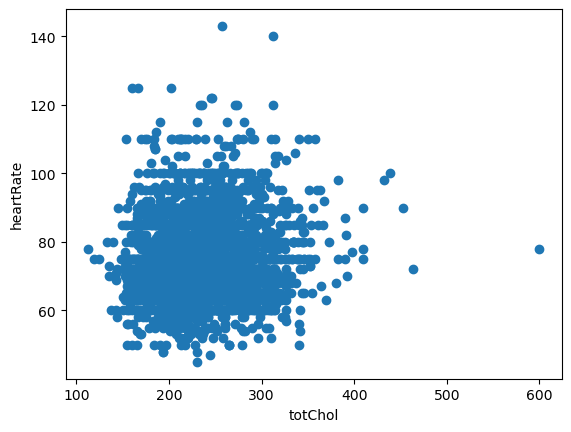

In [24]:
plt.scatter(data['totChol'], data['heartRate'])
plt.xlabel('totChol')
plt.ylabel('heartRate')

Text(0, 0.5, 'sysBP')

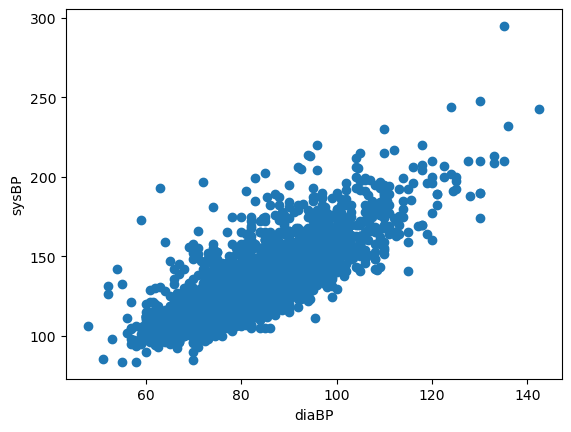

In [25]:
plt.scatter(data['diaBP'], data['sysBP'])
plt.xlabel('diaBP')
plt.ylabel('sysBP')